  identifier    weight       date
0        NUE  0.060000 2020-07-01
1        AMD  0.060000 2020-07-01
2       EXPE  0.060000 2020-07-01
3       NWSA  0.057763 2020-07-01
4        NWS  0.057128 2020-07-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   identifier  150 non-null    object        
 1   weight      150 non-null    float64       
 2   date        150 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.6+ KB
None

Missing values:
 identifier    0
weight        0
date          0
dtype: int64


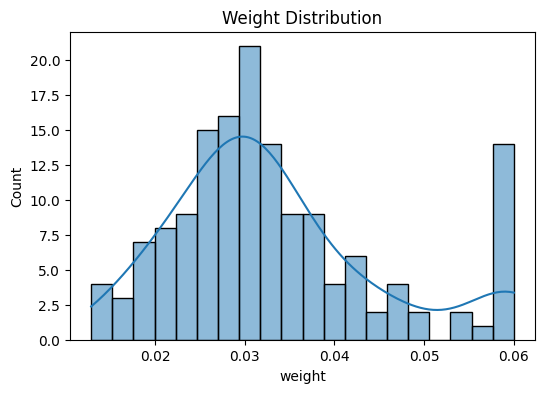

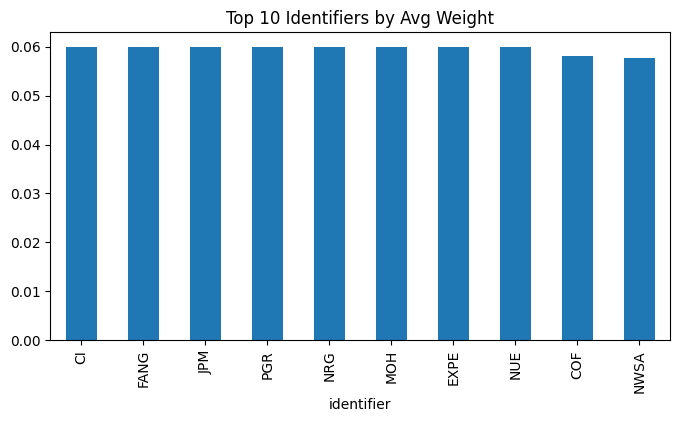

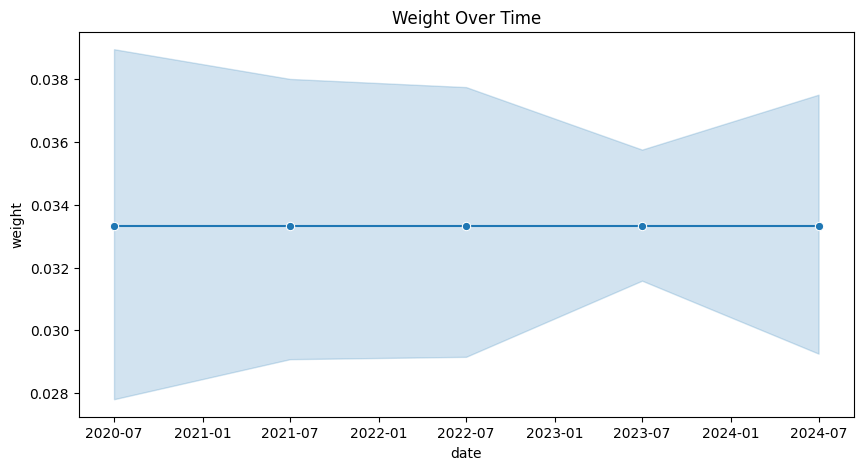

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel
df = pd.read_excel('/content/Assessment File - Python Engineer Role at Plutus21.xlsx')

# ---- FIX: handle CSV-like single column Excel ----
if df.shape[1] == 1:
    df = df.iloc[:, 0].str.split(',', expand=True)
    df.columns = ['identifier', 'weight', 'date']

# ---- Clean + types ----
df.columns = df.columns.str.strip().str.lower()
df['weight'] = df['weight'].astype(float)
df['date'] = pd.to_datetime(df['date'])

# ---- Quick checks ----
print(df.head())
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# ---- EDA ----
plt.figure(figsize=(6,4))
sns.histplot(df['weight'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.show()

plt.figure(figsize=(8,4))
df.groupby('identifier')['weight'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', title='Top 10 Identifiers by Avg Weight'
)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='date', y='weight', marker='o')
plt.title('Weight Over Time')
plt.show()
